In [1]:
import os
import csv


dataset_path = '/Users/meloboiz/Desktop/data_cleaned'

header = ['filepath', 'label']

file_data = []


for label_dir in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, label_dir)):
        for subdir in os.listdir(os.path.join(dataset_path, label_dir)):
            subdir_path = os.path.join(dataset_path, label_dir, subdir)
            if os.path.isdir(subdir_path):
                for file in os.listdir(subdir_path):
                    if file.lower().endswith(".jpg"):  
                        file_path = os.path.join(subdir_path, file)
                        file_data.append([file_path, label_dir])

csv_file_path = '/Users/meloboiz/Desktop/file_data.csv'
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(file_data)

print(f"CSV file created at {csv_file_path}")


CSV file created at /Users/meloboiz/Desktop/file_data.csv


In [1]:
pip install pandas matplotlib wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 315.9 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


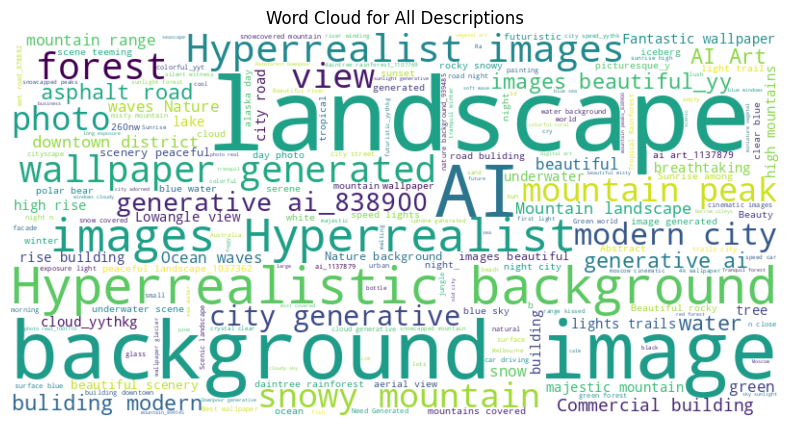

In [16]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


data = pd.read_csv('/Users/meloboiz/Desktop/EDA - 5153_EDA.csv')  


full_text = ' '.join(data['File name'])  
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(full_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Pictutres')
plt.show()




In [9]:
data

,Source,Type,Scenery Category,Category,File name,label
0,data_cleaned,real,forest,real-forest,23933,real
1,data_cleaned,real,forest,real-forest,23728,real
2,data_cleaned,real,forest,real-forest,24047,real
3,data_cleaned,real,forest,real-forest,23700,real
4,data_cleaned,real,forest,real-forest,24251,real
...,...,...,...,...,...,...
4663,data_cleaned,ai_generated,sea,ai_generated-sea,204682731,ai_generated
4664,data_cleaned,ai_generated,sea,ai_generated-sea,A vibrant underwater seascape,ai_generated
4665,data_cleaned,ai_generated,sea,ai_generated-sea,Ocean waves Nature background (4),ai_generated
4666,data_cleaned,ai_generated,sea,ai_generated-sea,45220850,ai_generated


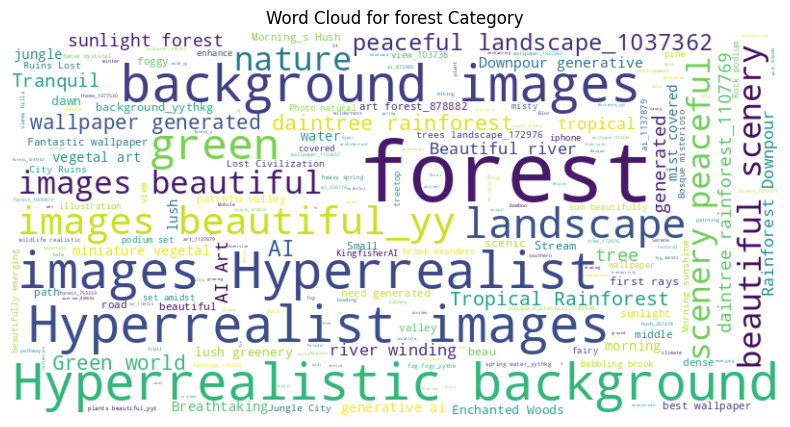

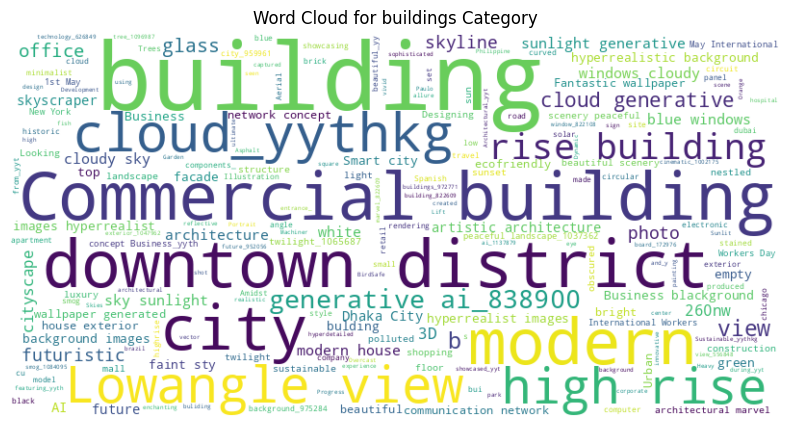

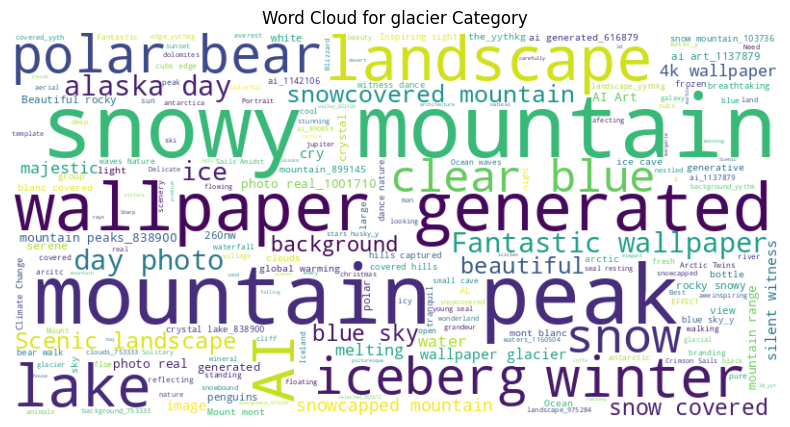

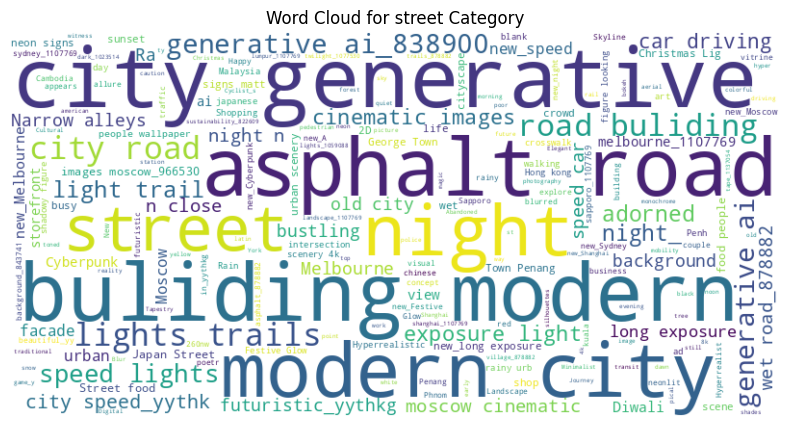

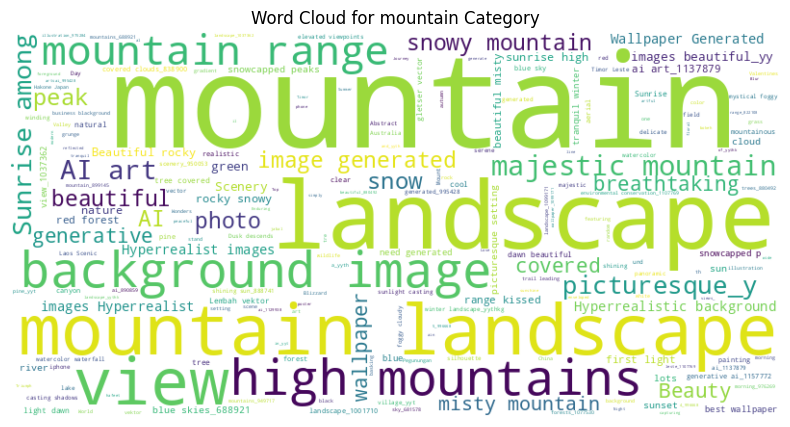

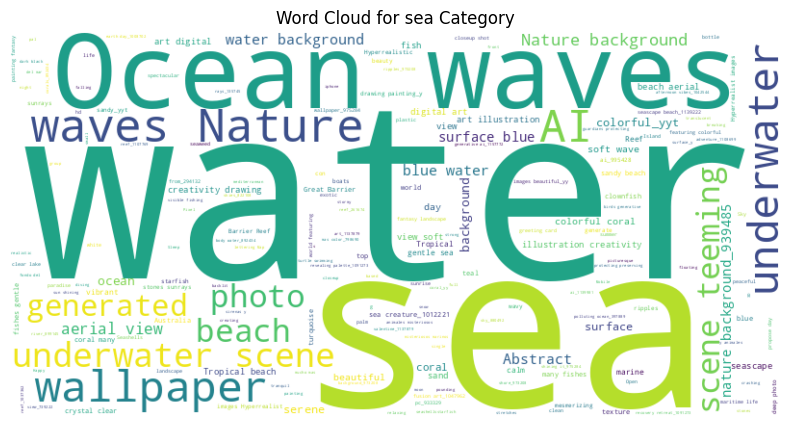

In [17]:
categories = data['Scenery Category'].unique()  
for category in categories:
    category_text = ' '.join(data[data['Scenery Category'] == category]['File name'])  
    if category_text.strip():  
        wordcloud = WordCloud(width=800, height=400,background_color='white' ).generate(category_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {category} Category')
        plt.show()
    else:
        print(f'No data to display word cloud for {category} category.')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


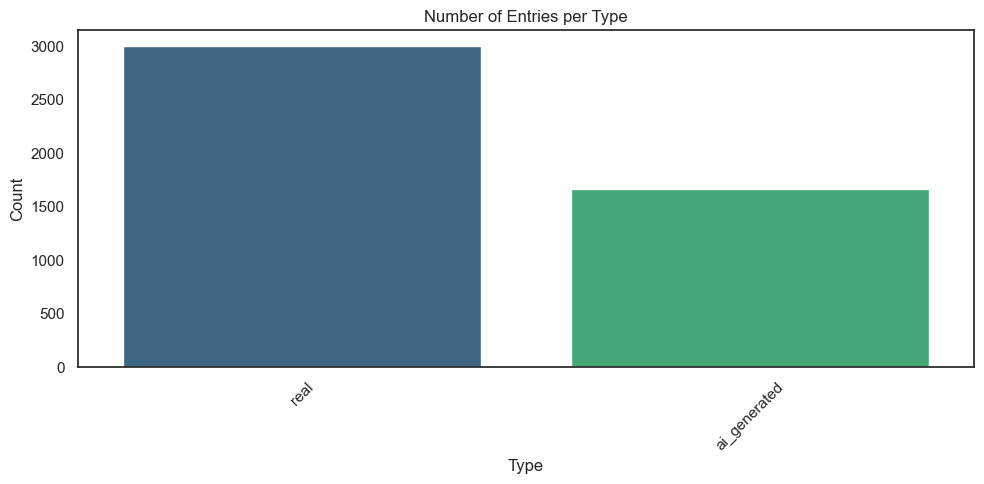

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


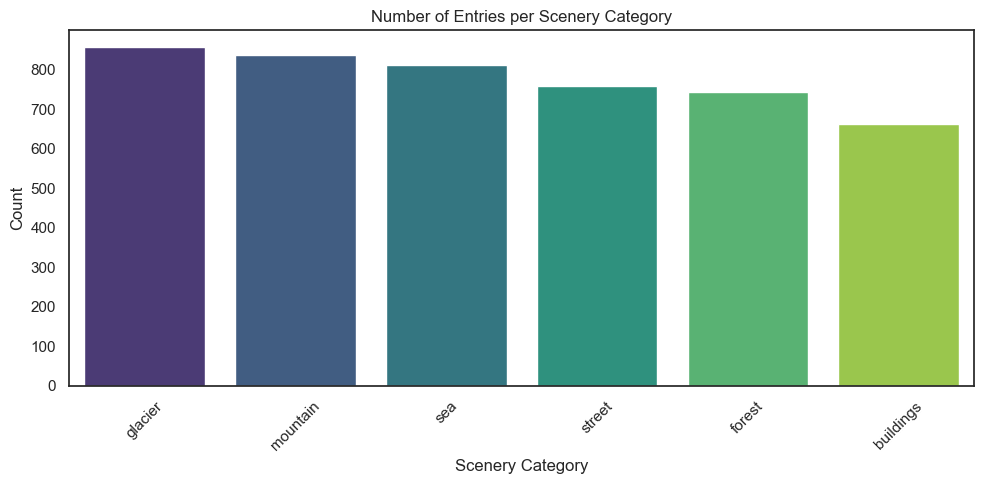

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


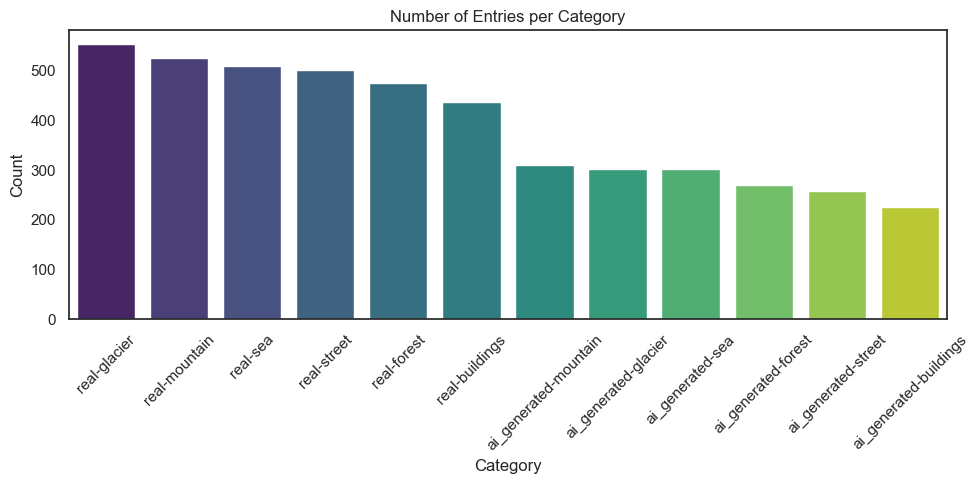

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="white") 
def plot_colorful_histogram(column_name):
    category_counts = data[column_name].value_counts()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')  # 使用'viridis'颜色图谱
    plt.title(f'Number of Entries per {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout() 
    plt.show()

plot_colorful_histogram('Type')
plot_colorful_histogram('Scenery Category')
plot_colorful_histogram('Category')
